In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 02 15:51:37 2018

@author: Shawnzy
"""
import warnings
warnings.filterwarnings('ignore')
#%% Imports
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.random_projection import GaussianRandomProjection

out = './'

#np.random.seed(0)
cancer = pd.read_hdf('../Input_Data/datasets.hdf','cancer')
cancerX = cancer.drop('diagnosis',1).copy().values
cancerY = cancer['diagnosis'].copy().values

madelon = pd.read_hdf('../Input_Data/datasets.hdf','madelon')        
madelonX = madelon.drop('Class',1).copy().values
madelonY = madelon['Class'].copy().values

cancer_dims = range(2,31)
madelon_dims = range(2,400,2)


In [2]:
cancer_evals = defaultdict(lambda: defaultdict(dict))
for dim in cancer_dims:
    """Apply the dimensionality reduction algorithms to the two datasets and
    describe what you see."""
    # Apply RCA 
    cscaler = StandardScaler()
    rca = GaussianRandomProjection(n_components=dim, random_state=5)
    X = cscaler.fit_transform(cancerX)
    X = rca.fit_transform(X)
    new_cancer = pd.pandas.DataFrame(np.hstack((X,cancerY.reshape(len(X),1))))
    new_cancer.to_hdf(out+'results.hdf','cancer_rca_dim{}'.format(str(dim)),complib='blosc',complevel=9)

    # Describe RCA results
    inv = np.linalg.pinv(rca.components_)
    R = cscaler.inverse_transform(np.dot(X, inv.T))  # Reconstruction
    cancer_evals['R_error'][dim] = sum(map(np.linalg.norm, R-cancerX))

df_cancer = pd.DataFrame(cancer_evals)

df_cancer.to_hdf(out+'results.hdf','cancer_RCA',complib='blosc',complevel=9)

import matplotlib.pyplot as plt 
fig = plt.figure()
ax = df_cancer.plot(y='R_error', title="Cancer - RCA - Reconstruction Error vs Dimensions")
ax.set(xlabel="Dimensions", ylabel="R_error")
plt.savefig(out+'Plots/cancer_rca.png')

<Figure size 432x288 with 0 Axes>

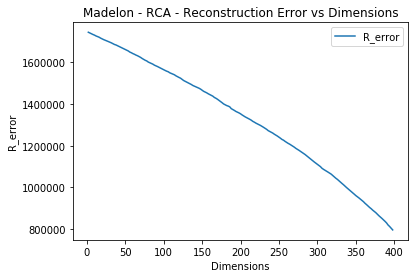

In [3]:
madelon_evals = defaultdict(lambda: defaultdict(dict))
for dim in madelon_dims:
    """Apply the dimensionality reduction algorithms to the two datasets and
    describe what you see."""
    # Apply RCA 
    mscaler = StandardScaler()
    rca = GaussianRandomProjection(n_components=dim, random_state=5)
    X = mscaler.fit_transform(madelonX)
    X = rca.fit_transform(X)
    new_madelon = pd.pandas.DataFrame(np.hstack((X,madelonY.reshape(len(X),1))))
    new_madelon.to_hdf(out+'results.hdf','madelon_rca_dim{}'.format(str(dim)),complib='blosc',complevel=9)

    # Describe RCA results
    inv = np.linalg.pinv(rca.components_)
    R = mscaler.inverse_transform(np.dot(X, inv.T))  # Reconstruction
    madelon_evals['R_error'][dim] = sum(map(np.linalg.norm, R-madelonX))

df_madelon = pd.DataFrame(madelon_evals)

df_madelon.to_hdf(out+'results.hdf','madelon_RCA',complib='blosc',complevel=9)

import matplotlib.pyplot as plt 
fig = plt.figure()
ax = df_madelon.plot(y='R_error', title="Madelon - RCA - Reconstruction Error vs Dimensions")
ax.set(xlabel="Dimensions", ylabel="R_error")
plt.savefig(out+'Plots/madelon_rca.png')